In [2]:
from planet4 import region_data, io, markings
from pathlib import Path

In [3]:
root = io.analysis_folder() / 'inca_s23_0.5cut_applied/'

In [4]:
fan_fnames = list(root.glob("*_fans_latlons.csv"))

In [5]:
blotch_fnames = list(root.glob("*_blotches_latlons.csv"))

In [6]:
from planet4 import markings

In [7]:
def get_marking(line, cut=0.8):
    data = []
    for marking in ['fan_','blotch_']:
        m = line[line.index.str.startswith(marking)]
        data.append(m.rename_axis(lambda x: x[x.index('_')+1:]))
    fnotch = markings.Fnotch(line.fnotch_value, data[0], data[1])
    return fnotch.get_marking(cut)

In [8]:
def get_final_markings_counts(img_name, cut=0.5):
    # writing in dictionary here b/c later I convert it to pd.DataFrame
    # for which a dictionary is a natural input format
    d = {}
    d['obsid'] = img_name
    blotch_fname = root / '{}_blotches_latlons.csv'.format(img_name)
    d['n_blotches'] = len(pd.read_csv(str(blotch_fname)))
    fan_fname = root / '{}_fans_latlons.csv'.format(img_name)
    d['n_fans'] = len(pd.read_csv(str(fan_fname)))
    
    return d

In [9]:
get_final_markings_counts('ESP_020115_0985')

{'n_blotches': 1211, 'n_fans': 185, 'obsid': 'ESP_020115_0985'}

In [10]:
from nbtools import ListProgressBar

In [11]:
results = []
progbar = ListProgressBar(region_data.Inca.season2)
for img_name in region_data.Inca.season2:
    progbar.value = img_name
    try:
        results.append(get_final_markings_counts(img_name))
    except OSError:
        continue
season2 = pd.DataFrame(results).sort_values(by='obsid')

In [12]:
results = []
progbar = ListProgressBar(region_data.Inca.season3)
for img_name in region_data.Inca.season3:
    progbar.value = img_name
    try:
        results.append(get_final_markings_counts(img_name))
    except OSError:
        continue
season3 = pd.DataFrame(results).sort_values(by='obsid')

In [13]:
season2.head()

,n_blotches,n_fans,obsid
14,1522,343,ESP_011491_0985
13,633,194,ESP_011544_0985
12,996,254,ESP_011557_0985
11,954,439,ESP_011623_0985
10,1859,599,ESP_011702_0985


In [14]:
season2.head()

,n_blotches,n_fans,obsid
14,1522,343,ESP_011491_0985
13,633,194,ESP_011544_0985
12,996,254,ESP_011557_0985
11,954,439,ESP_011623_0985
10,1859,599,ESP_011702_0985


In [15]:
season2_meta = pd.read_csv(io.analysis_folder() / 'inca_season2_metadata.csv')
# dropping the label path here as it's not required
# if it is, delete this line.
season2_meta.drop('path', axis=1, inplace=True)

In [16]:
season2_meta.head()

,obsid,binning,l_s,line_samples,lines
0,ESP_013113_0985,2,265.495717,40499,15596
1,ESP_013034_0985,2,261.604127,30527,12662
2,ESP_012889_0985,2,254.441753,20713,11458
3,ESP_012744_0985,1,247.270026,41301,22378
4,ESP_012691_0985,2,244.650075,26300,13993


In [17]:
season2 = season2.merge(season2_meta, on='obsid')

In [18]:
season2.head()

,n_blotches,n_fans,obsid,binning,l_s,line_samples,lines
0,1522,343,ESP_011491_0985,2,187.478012,70415,22905
1,633,194,ESP_011544_0985,2,189.864905,35322,12415
2,996,254,ESP_011557_0985,2,190.452778,33310,14858
3,954,439,ESP_011623_0985,2,193.451793,30651,13555
4,1859,599,ESP_011702_0985,2,197.072742,41019,17112


In [19]:
path = io.analysis_folder() / 'inca_season3_metadata.csv'
season3_meta = pd.read_csv(path)

In [20]:
season3 = season3.merge(season3_meta, on='obsid')

In [21]:
season2.set_index('l_s', inplace=True)

season3.set_index('l_s', inplace=True)

In [22]:
season2['both'] = season2.n_blotches + season2.n_fans

season3['both'] = season3.n_blotches + season3.n_fans

In [23]:
season2

,n_blotches,n_fans,obsid,binning,line_samples,lines,both
l_s,,,,,,,
187.478012,1522,343,ESP_011491_0985,2,70415,22905,1865
189.864905,633,194,ESP_011544_0985,2,35322,12415,827
190.452778,996,254,ESP_011557_0985,2,33310,14858,1250
193.451793,954,439,ESP_011623_0985,2,30651,13555,1393
197.072742,1859,599,ESP_011702_0985,2,41019,17112,2458
198.317827,1525,795,ESP_011729_0985,2,49747,17243,2320
206.290697,1822,1314,ESP_011900_0985,2,40748,13462,3136
223.313714,1499,1438,ESP_012256_0985,1,51209,24743,2937
226.521571,2111,1099,ESP_012322_0985,1,41042,22765,3210


In [24]:
season2['scaled'] = season2.both / season2.line_samples #/ season2.binning

season3['scaled'] = season3.both / season3.line_samples #/ season3.binning

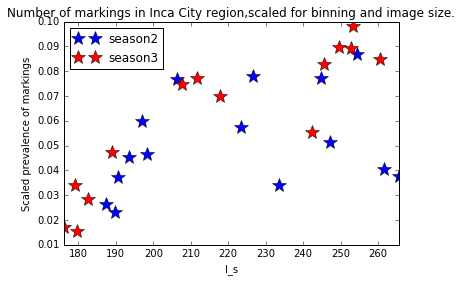

In [25]:
%matplotlib inline
season2.scaled.plot(style='*', ms=14, 
                    xlim=(season3.index.min(), season3.index.max()), label='season2')
season3.scaled.plot(style='*', color='red', label='season3', ms=14)
plt.legend(loc='best')
plt.ylabel('Scaled prevalence of markings')
plt.title("Number of markings in Inca City region,scaled for binning and image size.")
#plt.savefig('/Users/klay6683/Desktop/inca_s23.pdf')

In [25]:
map_proj_metadata = pd.read_csv('/Users/Anya/Dropbox/myPy/IC_season2_LineSampleScale.csv')

In [26]:
map_proj_metadata['area_km'] = 1e-6*map_proj_metadata.lines * \
    map_proj_metadata.samples*(map_proj_metadata.map_scale)**2
map_proj_metadata.set_index('id', inplace=True)

In [27]:
season2.set_index('obsid', inplace=True)

In [28]:
map_proj_metadata['scaled_nr_fans'] = season2.n_fans / map_proj_metadata.area_km
map_proj_metadata['scaled_nr_blos'] = season2.n_blotches / map_proj_metadata.area_km
map_proj_metadata['scaled_nr_both'] = season2.both / map_proj_metadata.area_km

In [29]:
map_proj_metadata.set_index('l_s', inplace=True)

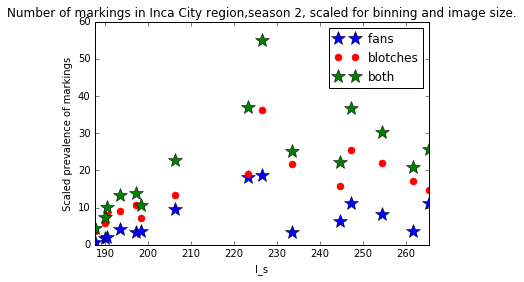

In [30]:
map_proj_metadata.scaled_nr_fans.plot(style='*', ms=14, 
                    xlim=(season3.index.min(), season3.index.max()), label='fans ')
map_proj_metadata.scaled_nr_blos.plot(style='.', color='red', label='blotches', ms=14)
map_proj_metadata.scaled_nr_both.plot(style='*', color='green', label='both', ms=14)
plt.legend(loc='best')
plt.ylabel('Scaled prevalence of markings')
plt.title("Number of markings in Inca City region,season 2, scaled for binning and image size.")


In [59]:
season2.n_blotches

obsid
ESP_011491_0985    1522
ESP_011544_0985     633
ESP_011557_0985     996
ESP_011623_0985     954
ESP_011702_0985    1859
ESP_011729_0985    1525
ESP_011900_0985    1822
ESP_012256_0985    1499
ESP_012322_0985    2111
ESP_012467_0985     636
ESP_012691_0985    1445
ESP_012744_0985    1469
ESP_012889_0985    1307
ESP_013034_0985    1017
ESP_013113_0985     875
Name: n_blotches, dtype: int64

In [29]:
fan_fnames_hdf = list(root.glob("*_fans.hdf"))
blotch_fnames_hdf = list(root.glob("*_blotches.hdf"))

In [46]:
n = 8
bc = markings.BlotchContainer.from_fname(blotch_fnames_hdf[n])
fc = markings.FanContainer.from_fname(fan_fnames_hdf[n])

# bc.content is list of Blotch objects
all_bl_areas = np.array([obj.area for obj in bc.content])
all_fan_areas = np.array([obj.area for obj in fc.content])

In [47]:
# some_other_stuff = [some other stuff]
# if above lists have same length then u can do
# df = pd.DataFrame({'areas':all_areas,
#                    'name2':some_other_stuff})

In [48]:
blotch_fnames[n], fan_fnames[n]

(PosixPath('/Users/Anya/Dropbox/p4_analysis/inca_s23_0.5cut_applied/ESP_012322_0985_blotches_latlons.csv'),
 PosixPath('/Users/Anya/Dropbox/p4_analysis/inca_s23_0.5cut_applied/ESP_012322_0985_fans_latlons.csv'))

In [49]:
#pd.read_csv(str(blotch_fnames[n]))

In [57]:
min_bl = np.nanmin(all_bl_areas)
min_fan = np.nanmin(all_fan_areas)
print(min_bl, np.nanmax(all_bl_areas), len(all_bl_areas))
print(min_fan, np.nanmax(all_fan_areas),  len(all_fan_areas))
all_fan_areas[all_fan_areas == np.nan] = all_fan_areas.max() +1

2165.59863409 79622.0428156 4
58.2243486496 175723.029923 94


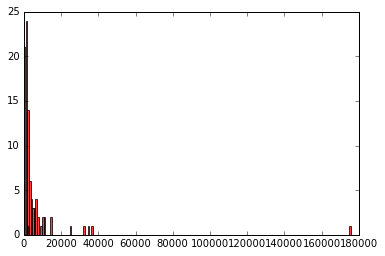

In [58]:
fh = plt.hist(all_fan_areas, bins = 200, range = (min_fan, np.nanmax(all_fan_areas)), alpha=0.75, color = 'red')
bh = plt.hist(all_bl_areas, bins = 200, range = (min_bl, min_bl+1e3), alpha=0.75, color = 'blue')

#fh = plt.hist(all_fan_areas, 200)

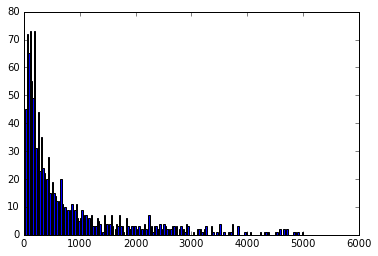

In [60]:
fh = plt.hist(all_fan_areas, bins = 200, range = (min_fan, 5e3), normed=True)

In [62]:
bh[1][:4]

array([  1.74736246,  26.73862565,  51.72988883,  76.72115202])